In [47]:
import pandas as pd
import numpy as np

Costumer_Exp = pd.read_excel('Customer Master Data.xlsx', sheet_name = 0, header = 0)
Costumer_Dom = pd.read_excel('Customer Master Data.xlsx', sheet_name = 1, header = 0)

In [48]:
Costumer_Exp.columns = Costumer_Exp.columns.str.strip()
Costumer_Exp = Costumer_Exp[['Contato','Cliente','Material','Incoterm','Prazo','Price','Proposed Price','Real','Volume/month','Status']]
Costumer_Exp = Costumer_Exp[Costumer_Exp['Material'].notna()]
Costumer_Exp['Destino'] = 'EXPORTAÇÃO'

Costumer_Dom.columns = Costumer_Dom.columns.str.strip()
Costumer_Dom = Costumer_Dom[['Contato','Cliente','Material','Incoterm','Prazo','Price','Proposed Price','Real','Volume/month','Status']]
Costumer_Dom = Costumer_Dom[Costumer_Dom['Material'].notna()]
Costumer_Dom['Destino'] = 'DOMÉSTICO'

Costumer = (pd.concat([Costumer_Exp, Costumer_Dom])).reset_index()
Costumer = Costumer.drop(['index'], axis =1)
Costumer['Status'] = Costumer['Status'].str.strip()

In [49]:
Costumer['Status'] = Costumer['Status'].str.replace(r'Aceito', 'Aprovado', regex = True)
Costumer['Status'] = Costumer['Status'].str.replace(r'Resolvido.+', 'Aprovado', regex = True)
Costumer['Status'] = Costumer['Status'].str.replace(r'Resolvido.+', 'Aprovado', regex = True)
Costumer['Status'] = Costumer['Status'].str.replace(r'Pendente.+', 'Pendente', regex = True)
Costumer['Status'] = Costumer['Status'].str.replace(r'Em negociação.+', 'Pendente', regex = True)
Costumer['Status'] = Costumer['Status'].str.replace(r'Aprovado.+', 'Aprovado', regex = True)
Costumer['Status'] = Costumer['Status'].str.replace(r'Enviado.+', 'Enviado', regex = True)
Costumer['Status'] = Costumer['Status'].str.replace(r'Aguardar.+', 'Pendente', regex = True)
Costumer['Status'] = Costumer['Status'].str.replace(r'Cliente pediu.+', 'Pendente', regex = True)
Costumer['Status'] = Costumer['Status'].str.replace(r'Fazer.+', 'Pendente', regex = True)
Costumer['Status'] = Costumer['Status'].str.replace(r'Recusado.+', 'Recusado', regex = True)

print(Costumer['Status'].value_counts())

Aprovado    29
Enviado     16
Pendente    14
Recusado     1
Name: Status, dtype: int64


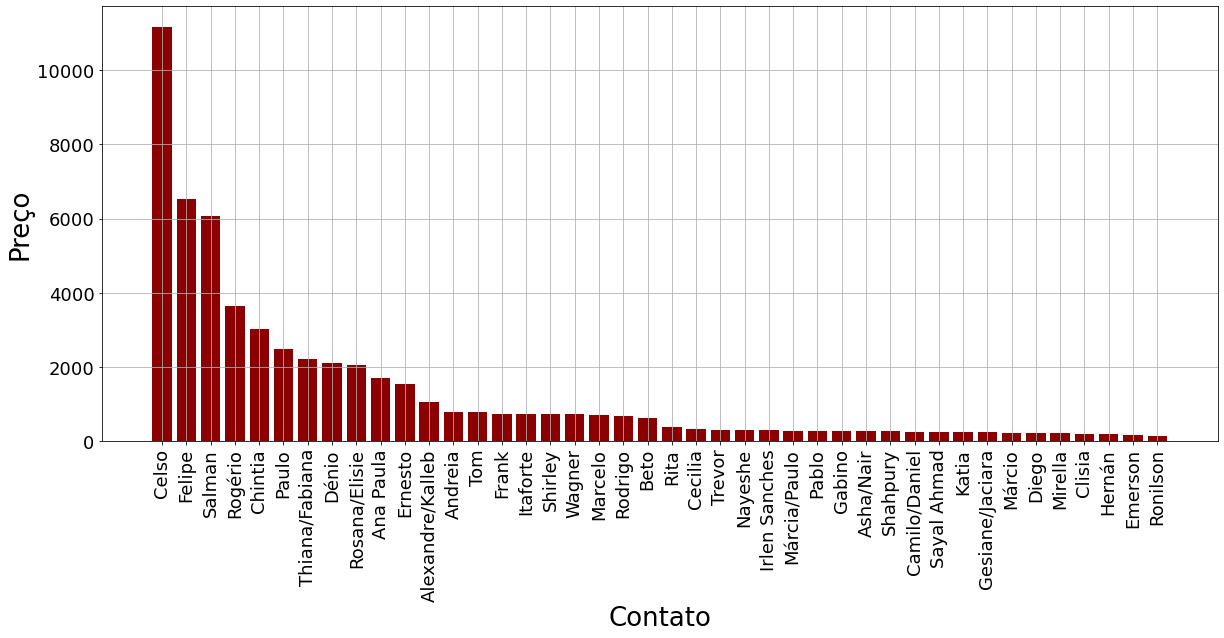

Valor total vendido: 


In [50]:
#Produto X Volume
Produto = (Costumer.groupby(['Contato']).Price.sum().to_frame(name = 'N Big Bags').reset_index()).sort_values('N Big Bags', ascending = False)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.bar(Produto.iloc[:,0].values, Produto.iloc[:,1].values,color = 'darkred')

plt.xlabel('Contato',size = 26)
plt.ylabel('Preço',size = 26)

plt.xticks(size = 18,rotation = 90)
plt.yticks(size = 18)

#plt.legend(loc = ('best'),fontsize=18)
plt.grid(True)
plt.show()
print ("Valor total vendido: ")

In [51]:
#Produto X Volume
Exp_Dom = (Costumer.groupby(['Destino']).Price.sum().to_frame(name = 'Preço em (R$)').reset_index()).sort_values('Preço em (R$)', ascending = False)
Exp_Dom

,Destino,Preço em (R$)
0,DOMÉSTICO,43372.23
1,EXPORTAÇÃO,12222.73


In [52]:
Costumer['Rentabilidade'] = Costumer['Price']/Costumer['Volume/month']
Costumer['Price']

0      290.0
1      260.0
2      310.0
3      305.0
4      270.0
       ...  
102    500.0
103    920.0
104    950.0
105    800.0
106    970.0
Name: Price, Length: 107, dtype: float64

In [53]:
Val_Agr

NameError: name 'Val_Agr' is not defined

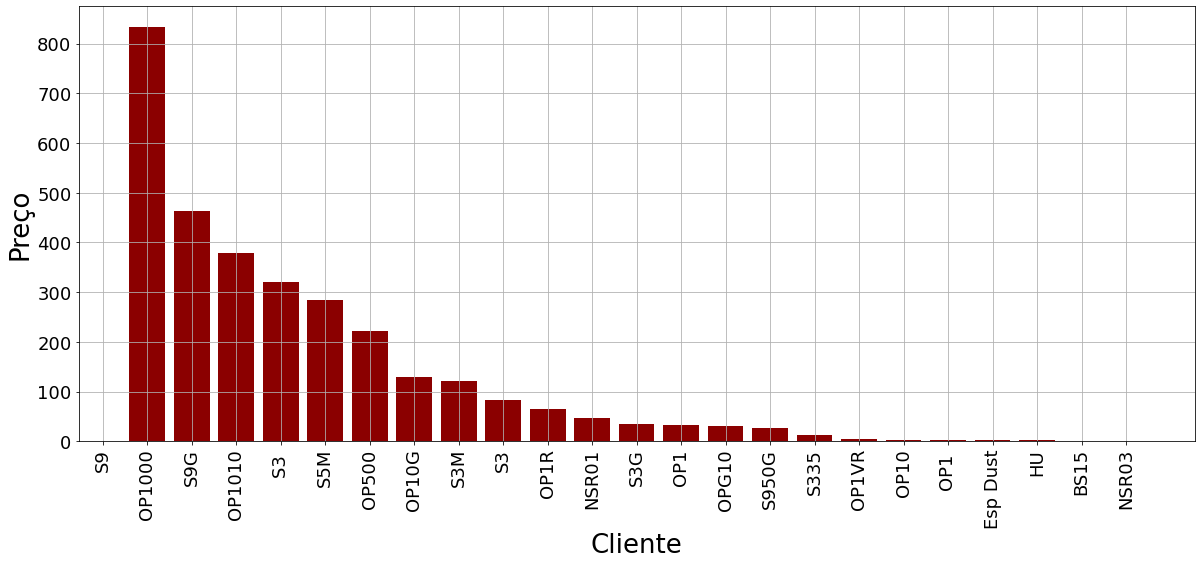

In [64]:
#Produto X Volume
Val_Agr = (Costumer.groupby(['Material']).Rentabilidade.mean().to_frame(name = 'Preço em (R$)').reset_index()).sort_values('Preço em (R$)', ascending = False)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

plt.bar(Val_Agr.iloc[:,0].values, Val_Agr.iloc[:,1].values,color = 'darkred')

plt.xlabel('Cliente',size = 26)
plt.ylabel('Preço',size = 26)

plt.xticks(size = 18,rotation = 90)
plt.yticks(size = 18)

#plt.legend(loc = ('best'),fontsize=18)
plt.grid(True)
plt.savefig('ProdxPreco.png', dpi=150, bbox_inches='tight')

plt.show()


In [66]:
from fpdf import FPDF
from datetime import datetime, timedelta
import os

WIDTH = 210
HEIGHT = 297

TEST_DATE = "10/20/20"

def create_title(day, pdf):
  pdf.set_font('Arial', '', 24)  
  pdf.ln(45)
  pdf.write(5, f"Relatório automático Marketing")
  pdf.ln(10)
  pdf.set_font('Arial', '', 16)
  pdf.write(4, f'{day}')
  pdf.ln(5)

def create_analytics_report(day=TEST_DATE, filename="Marketing.pdf"):
  pdf = FPDF() # A4 (210 by 297 mm)

  ''' First Page '''
  pdf.add_page()
  pdf.image("C:/Users/James Bond/Desktop/Hindalco/Marketing/Layout_MRTK.jpg", 0, 0, WIDTH)
  create_title(day, pdf)
  pdf.set_font('Arial', '', 16)
#  pdf.write(25, f"- O número de matriculádos dobrou em relação a decada passada.",'C')
  pdf.image("C:/Users/James Bond/Desktop/Hindalco/Marketing/ProdxPreco.png", 20, 80, ((7*WIDTH)/8)-20)
  pdf.output(filename, 'F')

if __name__ == '__main__':
  today = (datetime.today()).strftime("%d/%m/%y").lstrip("0")

  create_analytics_report(today)

In [ ]:
def create_analytics_report(day=TEST_DATE, filename="Report_Escola_de_Minas.pdf"):
  pdf = FPDF() # A4 (210 by 297 mm)

  ''' First Page '''
  pdf.add_page()
  pdf.image("./resources/report_layout.jpg", 0, 0, WIDTH)
  create_title(day, pdf)
  pdf.set_font('Arial', '', 16)
  pdf.write(25, f"- O número de matriculádos dobrou em relação a decada passada.",'C')
  pdf.image("./graficos_EM/matriculados.png", 20, 100, ((7*WIDTH)/8)-20)
  #pdf.cell(h=185, align='R', w=0, txt="- Proporcionalmente a Evasão da EM aumentou ao longo dos anos.", border=0) 
  pdf.multi_cell(w=0,h=6,fill='true', txt="\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n- Proporcionalmente a Evasão da EM aumentou ao longo dos anos.", border=0)
  pdf.image("./graficos_EM/Taxa_evasao.png", 10, 200, WIDTH-20)

  ''' Second Page '''
  pdf.add_page()
  pdf.set_font('Arial','',16)
  pdf.cell(h=50, align='C', w=0, txt="- Eng. Amb. e Met. foram os principais cursos a elevar a Taxa de Evasão", border=0)
  pdf.image("./graficos_EM/Taxa_evasao_cursos.png", 10, 55, WIDTH-20)

  ''' Second/2 Page '''
  pdf.add_page()
  pdf.set_font('Arial','',14)
  pdf.cell(20,10,'Dicionario de Dados',0,1,'L')
  pdf.multi_cell(h=8, align='C', w=0, txt="Cancelamento: Matricula cancelada pelo aluno\nDesligamento: Baixo rendimento acadêmico\nNRM: Não Renovou Matrícula\nReopcao: Mudança interna de curso\nTranferência: Mudança de curso com instituições externas\nJubilamento:Aluno não concluiu seu curso de Graduação na modalidade a distância no prazo correspondente ao tempo estabelecido na matriz curricular", border=1)
  pdf.set_font('Arial','',20)
  pdf.write(40, f"Motivos da Evasão")
  pdf.image("./graficos_EM/Taxa_evasao_motivos.png", 25, 120, WIDTH*0.8-20)
  pdf.set_font('Arial','',14)
  pdf.cell(130,10,'',0,1,'L')
  pdf.multi_cell(h=6, align='C', w=0, txt="\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nO Cancelamento de matricula seguido pelo Desligamento por baixo desempenho acadêmico apresentam um crescimento significativo nos ultimos anos, sendo os maiores responsaveis pelo aumento da Taxa de Evasão do curso.\n\nTodos os dados desse relatório foram coletados no endereço: http://dados.ufop.br/", border=0)

  ''' Fourth Page '''
  pdf.add_page()
  pdf.cell(20,10,f'Projetos de Iniciação Científica em 2017/2018')
  pdf.image("./Bolsas_EM/taxa_IC.png", 5, 20, 7*WIDTH/8-10)
  
  pdf.image("./Bolsas_EM/IC_voluntários.png", 5, 100, WIDTH/2-10)
  pdf.image("./Bolsas_EM/taxa_bolsistas.png", WIDTH/2, 100, WIDTH/2-10)

  pdf.image("./Bolsas_EM/Orientadores_melhores.jpg", 5, 180, WIDTH-20)
  pdf.output(filename, 'F')

  ''' Fifth Page '''
  pdf.add_page()
  pdf.cell(20,10,f'A Escola de Minas em Perspectiva')
  pdf.write(30, f'Vamos ver como a matérias dentro do ICEB se comportam em relação a EM')
  pdf.output(filename, 'F')